$\Huge Code$ $\hspace{0.1cm}$ $\Huge to$ $\hspace{0.1cm}$ $\Huge create$ $\hspace{0.1cm}$ $\Huge a$ $\hspace{0.1cm}$ $\Huge White$ $\hspace{0.1cm}$ $\Huge Noise$ $\hspace{0.1cm}$ $\Huge map$ $\hspace{0.1cm}$ $\Huge :$ 

# TO DO : 

# Modules :

In [1]:
import numpy as np 
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
import ccatp_sky_model as sky

# Function : 

## Compute pixel resolution : 

Geeting the size of an Healpy pixel depending on the $N_{SIDE}$ of the map : 
The Healpy map is basically a sphere composed of a given number of pixels. The solid angle of this sphere is 1.  Therefore we have that the surface of one pixel, is the surface of the sphere divided by the number of pixels : 

$S_{pix}= \frac{4\pi \times 1}{N_{pix}}$ and $N_{pix}=12\times N_{SIDE}^{2}$

Therefore the resolution of one pixel is the square root of the surface : 

$S_{pix}= \sqrt{\frac{4\pi \times 1}{N_{pix}}}$

now the solid angle is in radians, to put it in degrees we multiply by $180/\pi$ and to put it in arcmin we multiply by $60$ as $1$ arcmin = $1/60$ of a degree. 

In [2]:
def pix_reso(nside,arcmin=True): 
    
            
    """
    Compute the resolution of Healpy pixels in function of the nside of the map.  

    Parameters
    ----------
    
    nside : int
        Nside, number of separation of the healpy blocks. 
    arcmin : bool
        if True return the resolution in arcmin, otherwise in radians. 
        
    Returns
    -------
    float
        The resolution of one healpy pixel. 

    """
    
    #Number of pixels : 
    N_pix = hp.pixelfunc.nside2npix(nside)
    
    #Compute the unit : 
    if arcmin == True :        
        multi=(180*60/np.pi)        
    else:        
        multi=1
        
    #Compute the resolution :     
    reso = np.sqrt(((4*np.pi)/N_pix)*multi**2)

    return reso

## Create a white noise map : 

###### Scaling of the noise with the pixels sizes : 

Noise is often given in $\mu K-arcmin$. However to create a White noise map we need to convert that into a quantity of $mu K$ per pixels. The pixels of a Healpy map can be express in arcmin but are not necessary $1$arcmin. In that case, the amount of noise has to be adjusted to the pixel size to be equivalent to $\mu K-arcmin$. 

- For example: If we have a noise of $10\mu K-arcmin$ and the pixel size is 1 arcmin. Then we need to put a white noise of $10\mu K$ in each pixel.

- If the pixel sizes are smaller, the noise injected in each pixel will be more than  $10\mu K-arcmin$. If the pixel size is bigger than $1$arcmin, the noise in each pixel will be less than $10\mu K-arcmin$.

In conclusion, to get the same noise, the injected value in each pixel will be higher if the pixel size is smaller and lower if the pixel size is bigger. Which is intuitive, because if you have smaller pixels, containing a given noise, you average over a few of them to get your 1 arcmin pixels, this will result in lower noise. Therefore to keep the correct level of noise, for smaller pixels you need to inject a higher noise. So that when averaging over them to go back to your 1arcmin noise you get a high enough value. For bigger pixels, you have the opposite behavior. 

Leading to this formula : 

$wanted_{N} \mu K-arcmin = N/pixel_{size}$ 

then :  $N = \frac{wanted_{N}\mu K-arcmin}{pixel_{size}}$

###### Simulating White noise : 

Simulating white noise basically consists of drawing a random normal distribution centered around the value of the noise we desire. 

In [7]:
def simulate_white_noise(freq, noise_level, nside_out = 4096, unit_noise = 1, arcmin = True, unit = 'cmb'): 
        
    '''
    Function which create a White noise map for a given noise/arcmin or noise/radians. 
    By default the code expect the noise level to be given in microK_CMB/arcmin
    Parameters
    ----------
    freq: float or float array
        Frequency of the output map in Hz.If freq=0 we get a frequency independent map. 
    noise_level: float, optional 
        noise level desired in any units of micro K_CMB by radians or arcmin.
    nside_out: float, optional
        Healpix nside parameter of the output map. Must be a valid value for nside.
        Default: 4096
    unit_noise: float, optional 
        resolution of the noise, for exemple 1' or 1 radians. Default: 1
    arcmin: bool, optional 
        if true mean that the noise is given in /arcmin. Default: True
    unit: bool, optional
        Determines the units of the output map. The available units are 'mjy' --> MJy/sr
        (specific intensity), 'cmb' --> K_CMB (thermodynamic temperature), and 
        'rj' --> K_RJ (brightness temperature). Default: 'mjy'.
        
    Returns
    -------
    array
        Array contaning the Variarion of intensity produced by tSZ over the fequencies. 
    '''
    
    #Compute the average noise in each pixel : 
    sigma_noise = (noise_level * unit_noise)/pix_reso(nside_out,arcmin)
        
    #Create White-noise map :
    npix = hp.pixelfunc.nside2npix(nside_out) #Compute the number of pixels
    noise_map =  np.random.normal(0, sigma_noise, npix)*1e-6 #Random normal distribution centered over the desired noise

    #Convert units if necessary
    if unit == 'cmb':
        None
    elif unit == 'mjy':
        noise_map = sky.convert_units(freq, noise_map, cmb2mjy=True)
    elif unit == 'rj':
        noise_map = sky.convert_units(freq, noise_map, cmb2rj=True)
    else:
        print('Waring: Unknown unit! Output will be in K_CMB')
    
    return(np.float32(noise_map))

# Launch : 

## for 10$\mu K-arcmin$ and nside = 2048 :

In [15]:
noise_map = simulate_white_noise(freq=0, noise_level=10, nside_out = 2048, unit_noise = 1, arcmin = True, unit = 'cmb')

/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


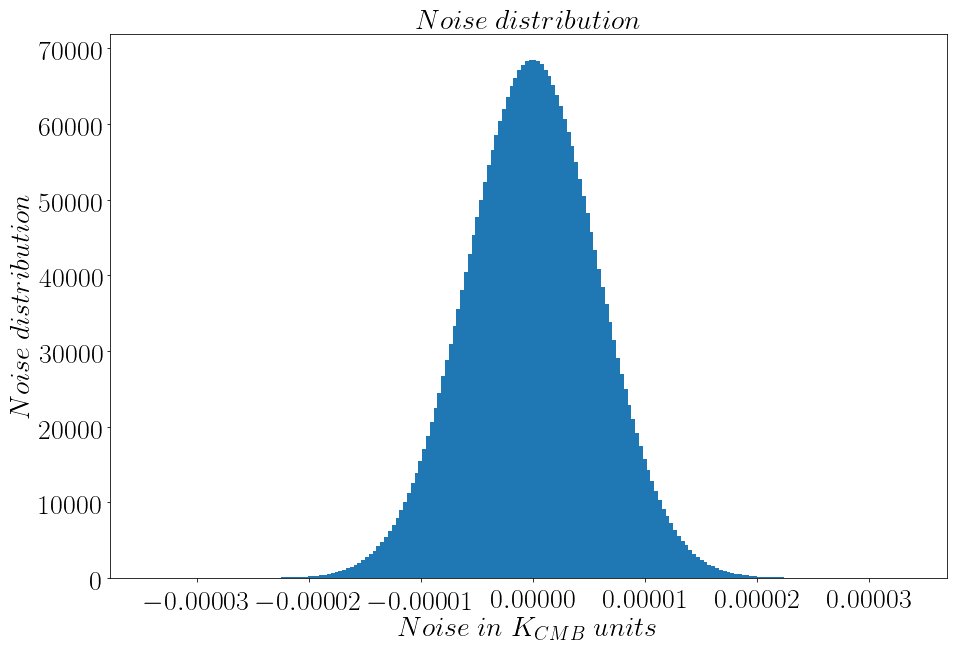

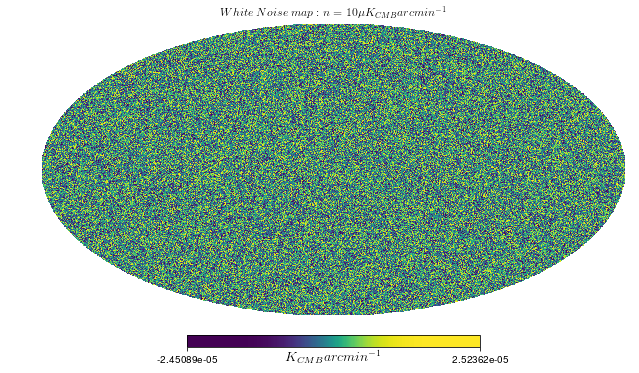

In [16]:
#Display and save the distribution: 
plt.hist(noise_map,200,normed=True) #Display histogram of the distribution
plt.title('$Noise$ $distribution$',fontsize=28)
plt.xlabel('$Noise$ $in$ $K_{CMB}$ $units$',fontsize=28)
plt.ylabel('$Noise$ $distribution$',fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.rcParams['figure.figsize'] = [15, 10]

#Display map The White noise map: 
hp.mollview(noise_map, title="$White$ $Noise$ $map$ $:$ $n= 10 \mu K_{CMB}arcmin^{-1}$", norm='hist',unit='$K_{CMB}arcmin^{-1}$')